In [41]:
import numpy as np # library used for mathematical manipulations
import pandas as pd # library used for importing data and it's conversion in proper format.
import matplotlib.pyplot as plt # Library used to plot graphs and other types of  visualisation of data.

In [42]:
x_data = pd.read_csv('G:/iris_data.csv')

In [43]:
print(x_data.shape) # no. of instances of the data and no. of attributes each data contain.

(149, 5)


In [44]:
x_data.head() # this displays first few points in data so as to observe the behaviour data for further usages.

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [45]:
print(type(x_data))  


<class 'pandas.core.frame.DataFrame'>


In [46]:
x=x_data.values

In [47]:
print(type(x))
print(type(x[0][4]))

<class 'numpy.ndarray'>
<class 'str'>


In [48]:
print(x.shape)

(149, 5)


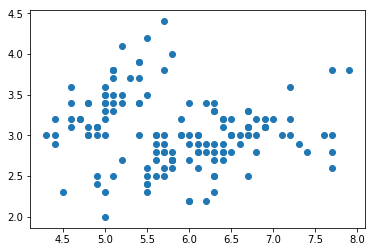

In [49]:
plt.scatter(x[:,0],x[:,1]) # scatter plot between two attributes of the IRIS data-set.

1


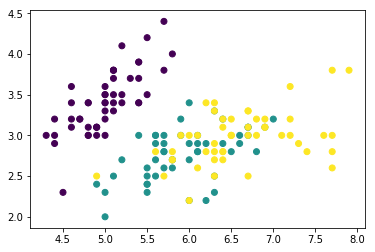

In [51]:
for i in range(149):
    if x[i][4]=="Iris-setosa":
        x[i][4]=1
    elif x[i][4]=="Iris-versicolor":
        x[i][4]=2
    else:  # this is for "Iris-virginica"
        x[i][4]=3
    
print(x[23][4])



plt.scatter(x[:,0],x[:,1],c=x[:,4]) # return the graph n the form of object
plt.show() # used to show the graph in presentable format

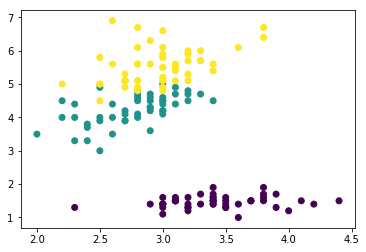

In [53]:
plt.scatter(x[:,1],x[:,2],c=x[:,4]) # return the graph n the form of object
plt.show() # used to show the graph in presentable format

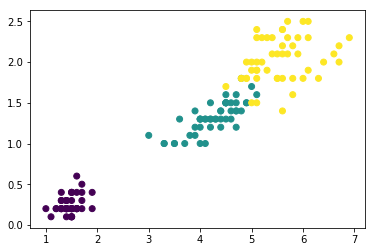

In [54]:
plt.scatter(x[:,2],x[:,3],c=x[:,4]) # return the graph n the form of object
plt.show() # used to show the graph in presentable format

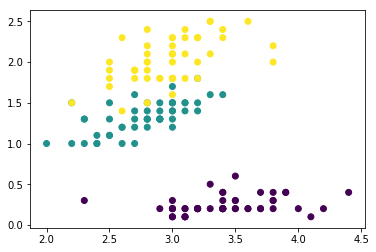

In [55]:
plt.scatter(x[:,1],x[:,3],c=x[:,4]) # return the graph n the form of object
plt.show() # used to show the graph in presentable format

In [177]:
k=3
color=['green','red','blue','yellow','orange']

clusters={}
n=x.shape[0]

for i in range(k):
    center = x[n//2+i]
    points=[]
    
    cluster={
         'center':center,
         'points' :points,
         'colour':color[i]
        
    }
    
    clusters[i]=cluster
    
print(clusters)

{0: {'center': array([6.6, 3.0, 4.4, 1.4, 2], dtype=object), 'points': [], 'colour': 'green'}, 1: {'center': array([6.8, 2.8, 4.8, 1.4, 2], dtype=object), 'points': [], 'colour': 'red'}, 2: {'center': array([6.7, 3.0, 5.0, 1.7, 2], dtype=object), 'points': [], 'colour': 'blue'}}


In [178]:
clusters

{0: {'center': array([6.6, 3.0, 4.4, 1.4, 2], dtype=object),
  'points': [],
  'colour': 'green'},
 1: {'center': array([6.8, 2.8, 4.8, 1.4, 2], dtype=object),
  'points': [],
  'colour': 'red'},
 2: {'center': array([6.7, 3.0, 5.0, 1.7, 2], dtype=object),
  'points': [],
  'colour': 'blue'}}

In [179]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [180]:
# assigning points to clusters(E-step of expectation maximization problem)
# K-Means is the special case of expectation maximization problem
def assign_points_to_clusters(clusters):
    # iterating in every cluster
    for i in range(x.shape[0]):
        dist_of_this_point_from_every_cluster_center = []
        current_point=x[i]
    
    # now iterating in every cluster
        for kx in range(k):
            distance_from_center=distance(current_point,clusters[kx]['center'])
            dist_of_this_point_from_every_cluster_center.append(distance_from_center)
        
        current_cluster=np.argmin(dist_of_this_point_from_every_cluster_center)
        clusters[current_cluster]['points'].append(current_point)
        #print(clusters[current_cluster]['points'])

        
    
    

In [181]:
assign_points_to_clusters(clusters)
print(x.shape[0])

149


In [182]:
def updateClusters(clusters):   # M-step -> we update every cluster center acording to mean of the cluster
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]



def plotclusters(clusters):
    
    for kx in range(k):
        #print(type(clusters[kx]['points']))
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,1],pts[:,2],color=clusters[kx]['colour'])
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[1],uk[2],color='black',marker="*")
    

    
    

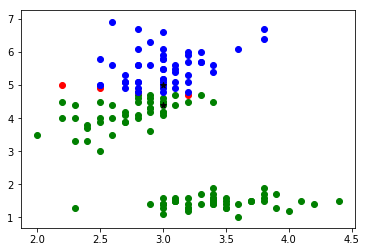

In [183]:
plotclusters(clusters)

Time:  0.1024731673860515


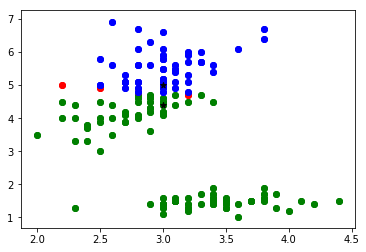

In [184]:
import timeit
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()
print('Time: ', stop - start) 

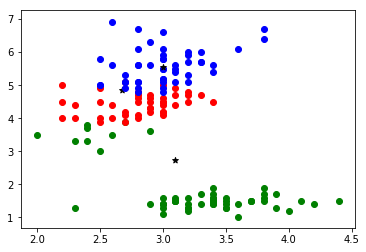

In [185]:
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

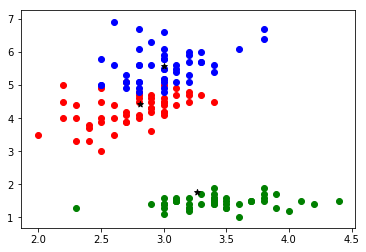

In [186]:
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

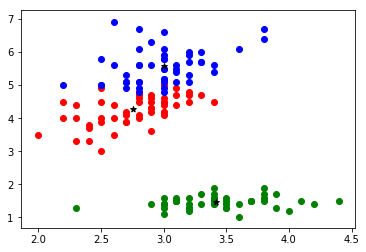

In [187]:
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

Time:  0.11762774726230418


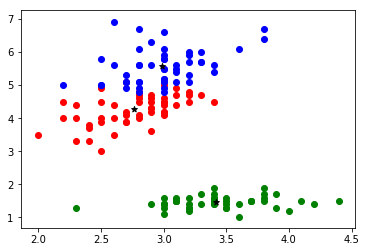

In [188]:
import timeit
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()
print('Time: ', stop - start) 